In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

py_file_location = ".."
sys.path.append(os.path.abspath(py_file_location))

from fints_generation.models.tcn_gan import TCNGAN

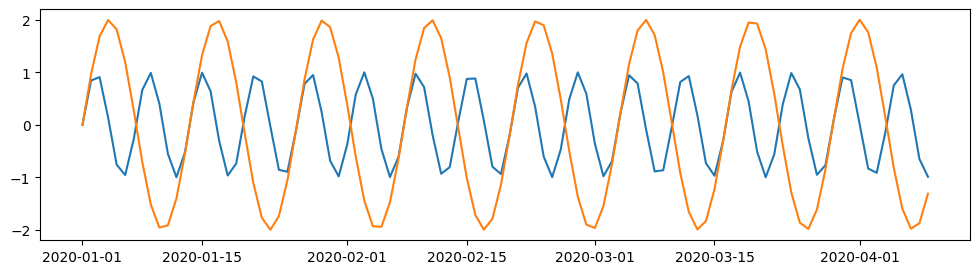

In [7]:
N = 1000
data = pd.DataFrame({
    'X1': np.sin(np.linspace(0, N/1, N)),
    'X2': np.sin(np.linspace(0, N/2, N))*2,
}, index=pd.date_range('2020-01-01', periods=N, freq='D'))

plt.figure(figsize=(12, 3))
plt.plot(data.iloc[:100]);

In [14]:
gan = TCNGAN(
    input_size=len(data.columns),
    hidden_size=16,
    latent_size=16,
    num_layers=2,
    window_size=20,
    batch_size=16,
    num_epochs=50,
    verbose=True,
    generator_lr=1e-3,
    discriminator_lr=1e-3,
    num_disc_steps=1,
    dropout=0
)
gan.fit(data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type              | Params
----------------------------------------------------
0 | generator     | _TCNGenerator     | 2.1 K 
1 | discriminator | _TCNDiscriminator | 1.7 K 
----------------------------------------------------
3.9 K     Trainable params
0         Non-trainable params
3.9 K     Total params
0.015     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


In [15]:
fakes = gan.sample(data.index, n_samples=10)
fakes[0].head()

,X1,X2
2020-01-01,-0.051895,0.315088
2020-01-02,-0.091496,0.351435
2020-01-03,-0.024164,0.452216
2020-01-04,-0.116240,0.280090
2020-01-05,-0.105852,0.168148


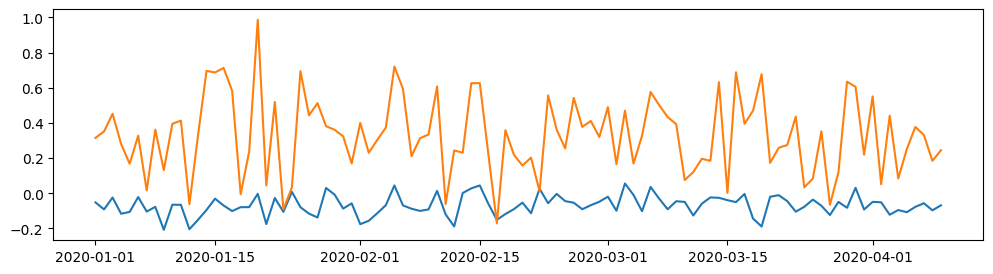

In [16]:
plt.figure(figsize=(12, 3))
plt.plot(fakes[0].iloc[:100]);